# Covid-19 New Case Predictor 
### Using Neural Network with four input: date, state, newCases,  newDeaths
-----------------------------------------------
by Roya Salei

Course CS4200- Artificial Intelligence 

Professor: Dr. Husain Zaidi

In [ ]:
!pip install tensorflow==1.15.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)

1.15.0


In [3]:
# read data from file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS4200-Predict-Covid-New-Cases/clean_state_ts.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,date,region,division,state,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,mask_mandate,daily_infection_rate,daily_death_rate,newCases_density,newDeaths_density
0,1.601942e+09,4,9,AK,145.0,9656.0,0.0,54.0,17587.0,643035.0,0.0,1565.0,1018.0,45.0,130.0,93.0,6.0,0,0.197712,0.000000,0.253518,0.000000
1,1.602029e+09,4,9,AK,128.0,9784.0,1.0,55.0,18076.0,650205.0,0.0,1565.0,1011.0,46.0,133.0,100.0,8.0,0,0.174532,0.001364,0.223795,0.001748
2,1.602115e+09,4,9,AK,135.0,9919.0,1.0,56.0,18542.0,656852.0,0.0,1569.0,1042.0,51.0,141.0,94.0,8.0,0,0.184076,0.001364,0.236034,0.001748
3,1.602202e+09,4,9,AK,180.0,10099.0,0.0,56.0,18907.0,664568.0,0.0,1604.0,1065.0,64.0,137.0,86.0,9.0,0,0.245435,0.000000,0.314712,0.000000
4,1.602288e+09,4,9,AK,251.0,10350.0,0.0,56.0,19173.0,668299.0,0.0,1604.0,969.0,54.0,137.0,89.0,9.0,0,0.342246,0.000000,0.438849,0.000000


In [4]:
# change state name to integer
states = df['state'].unique()
for i, j in enumerate(states):
    df['state'] = df['state'].replace(j, i)  
df.tail(5)

,date,region,division,state,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,mask_mandate,daily_infection_rate,daily_death_rate,newCases_density,newDeaths_density
21325,1.635984e+09,4,8,50,537.0,104940.0,0.0,1243.0,81819.0,1028372.0,255655.0,1748.0,941.0,179.0,139.0,72.0,36.0,0,0.930916,0.0,5.530381,0.0
21326,1.636070e+09,4,8,50,378.0,105318.0,0.0,1243.0,82057.0,1030728.0,256237.0,1748.0,923.0,181.0,139.0,76.0,36.0,0,0.655282,0.0,3.892894,0.0
21327,1.636157e+09,4,8,50,0.0,105318.0,0.0,1243.0,82202.0,1032878.0,256695.0,1747.0,881.0,169.0,137.0,79.0,37.0,0,0.000000,0.0,0.000000,0.0
21328,1.636243e+09,4,8,50,0.0,105318.0,0.0,1243.0,82344.0,1033805.0,256745.0,1747.0,881.0,175.0,137.0,78.0,41.0,0,0.000000,0.0,0.000000,0.0
21329,1.636330e+09,4,8,50,672.0,105990.0,0.0,1243.0,82367.0,1034107.0,256772.0,1602.0,806.0,185.0,139.0,74.0,41.0,0,1.164946,0.0,6.920700,0.0


In [5]:
#convert numpy.float to datetime
dates_input = df["date"].values.astype('datetime64[s]')
for i, j in enumerate(dates_input):
  df.loc[i, 'date'] = j

In [6]:
max_date = max(df.date)
min_date = min(df.date)
print(min_date, max_date)
dates = pd.date_range(start=min_date, end=max_date)
dates

2020-09-01T00:00:00 2021-11-08T00:00:00


DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10',
               ...
               '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02',
               '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
               '2021-11-07', '2021-11-08'],
              dtype='datetime64[ns]', length=434, freq='D')

In [7]:
# keep 'cases','deaths', 'positiveTests', 'negativeTests', 'vaccinationsCompleted'
# use entire US data 
features = ['date', 'cases', 'newDeaths',
       'deaths', 'positiveTests', 'negativeTests', 'vaccinationsCompleted',
       'hospitalBeds.capacity', 'hospitalBeds.currentUsageTotal',
       'hospitalBeds.currentUsageCovid', 'icuBeds.capacity',
       'icuBeds.currentUsageTotal', 'icuBeds.currentUsageCovid',
       ]

df = df.drop(['region', 'division', 'state', 'mask_mandate', 
       'newCases_density', 'newDeaths_density',
       'daily_infection_rate', 'daily_death_rate'], axis=1)
df.head(5)

,date,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid
0,2020-10-06T00:00:00,145.0,9656.0,0.0,54.0,17587.0,643035.0,0.0,1565.0,1018.0,45.0,130.0,93.0,6.0
1,2020-10-07T00:00:00,128.0,9784.0,1.0,55.0,18076.0,650205.0,0.0,1565.0,1011.0,46.0,133.0,100.0,8.0
2,2020-10-08T00:00:00,135.0,9919.0,1.0,56.0,18542.0,656852.0,0.0,1569.0,1042.0,51.0,141.0,94.0,8.0
3,2020-10-09T00:00:00,180.0,10099.0,0.0,56.0,18907.0,664568.0,0.0,1604.0,1065.0,64.0,137.0,86.0,9.0
4,2020-10-10T00:00:00,251.0,10350.0,0.0,56.0,19173.0,668299.0,0.0,1604.0,969.0,54.0,137.0,89.0,9.0


In [8]:
df.head(5)

,date,newCases,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid
0,2020-10-06T00:00:00,145.0,9656.0,0.0,54.0,17587.0,643035.0,0.0,1565.0,1018.0,45.0,130.0,93.0,6.0
1,2020-10-07T00:00:00,128.0,9784.0,1.0,55.0,18076.0,650205.0,0.0,1565.0,1011.0,46.0,133.0,100.0,8.0
2,2020-10-08T00:00:00,135.0,9919.0,1.0,56.0,18542.0,656852.0,0.0,1569.0,1042.0,51.0,141.0,94.0,8.0
3,2020-10-09T00:00:00,180.0,10099.0,0.0,56.0,18907.0,664568.0,0.0,1604.0,1065.0,64.0,137.0,86.0,9.0
4,2020-10-10T00:00:00,251.0,10350.0,0.0,56.0,19173.0,668299.0,0.0,1604.0,969.0,54.0,137.0,89.0,9.0


In [9]:
# build a new dataframe with the above columns only
dff = pd.DataFrame(0, index=np.arange(len(dates)), columns=features)
dff['date'] = dates
for k in dates:
  dff.loc[dff.date==k,'newCases'] = df.loc[df.date==k,'newCases'].sum()
  dff.loc[dff.date==k,'cases'] = df.loc[df.date==k,'cases'].sum()
  dff.loc[dff.date==k,'newDeaths'] = df.loc[df.date==k,'newDeaths'].sum()
  dff.loc[dff.date==k,'deaths'] = df.loc[df.date==k,'deaths'].sum()
  dff.loc[dff.date==k,'positiveTests'] = df.loc[df.date==k,'positiveTests'].sum()
  dff.loc[dff.date==k,'negativeTests'] = df.loc[df.date==k,'negativeTests'].sum()
  dff.loc[dff.date==k,'vaccinationsCompleted'] = df.loc[df.date==k,'vaccinationsCompleted'].sum()

  dff.loc[dff.date==k,'hospitalBeds.capacity'] = df.loc[df.date==k,'hospitalBeds.capacity'].sum()
  dff.loc[dff.date==k,'hospitalBeds.currentUsageTotal'] = df.loc[df.date==k,'hospitalBeds.currentUsageTotal'].sum()
  dff.loc[dff.date==k,'hospitalBeds.currentUsageCovid'] = df.loc[df.date==k,'hospitalBeds.currentUsageCovid'].sum()
  dff.loc[dff.date==k,'icuBeds.capacity'] = df.loc[df.date==k,'icuBeds.capacity'].sum()
  dff.loc[dff.date==k,'icuBeds.currentUsageTotal'] = df.loc[df.date==k,'icuBeds.currentUsageTotal'].sum()
  dff.loc[dff.date==k,'icuBeds.currentUsageCovid'] = df.loc[df.date==k,'icuBeds.currentUsageCovid'].sum()
dff.head(5)

,date,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,newCases
0,2020-09-01,4702669.0,784.0,158509.0,6073654.0,68354415.0,0.0,583136.0,402783.0,33458.0,64233.0,44166.0,7279.0,30916.0
1,2020-09-02,5437210.0,973.0,166839.0,7182320.0,75367071.0,0.0,659853.0,453199.0,38662.0,70229.0,49235.0,8335.0,33892.0
2,2020-09-03,5597051.0,1007.0,176906.0,7383692.0,78655070.0,0.0,678691.0,466853.0,38047.0,72514.0,50205.0,8258.0,38710.0
3,2020-09-04,5393914.0,838.0,169397.0,7143558.0,75761703.0,0.0,647843.0,444319.0,35563.0,69250.0,47980.0,7990.0,39578.0
4,2020-09-05,5748622.0,648.0,179589.0,7544954.0,81122947.0,0.0,686127.0,452353.0,36504.0,73229.0,49349.0,8192.0,37698.0


In [10]:
dff.set_index('date', inplace = True)

In [11]:
dff.tail(5)

,cases,newDeaths,deaths,positiveTests,negativeTests,vaccinationsCompleted,hospitalBeds.capacity,hospitalBeds.currentUsageTotal,hospitalBeds.currentUsageCovid,icuBeds.capacity,icuBeds.currentUsageTotal,icuBeds.currentUsageCovid,newCases
date,,,,,,,,,,,,,
2021-11-04,44706351.0,1067.0,735531.0,46590213.0,569106270.0,182571906.0,756517.0,585251.0,45024.0,80450.0,61250.0,11067.0,78320.0
2021-11-05,44794446.0,2282.0,737813.0,46657594.0,570361116.0,182742609.0,756225.0,580965.0,44575.0,80395.0,60999.0,10848.0,88095.0
2021-11-06,44826237.0,397.0,738210.0,46709601.0,571173546.0,182929722.0,750799.0,561987.0,43730.0,79639.0,59419.0,10699.0,31791.0
2021-11-07,39120671.0,104.0,657045.0,40995073.0,474910150.0,155144310.0,672370.0,493692.0,38519.0,71238.0,51993.0,9332.0,20641.0
2021-11-08,31262823.0,911.0,521309.0,32208956.0,397300981.0,126077427.0,500454.0,374939.0,33427.0,57145.0,41772.0,7867.0,89351.0


In [12]:
# select mask mandate as a label for categorizing data
label = dff['newCases'].values
label.shape

(434,)

In [13]:
features = dff

# Preprocesing Data

In [14]:
# convert feature_names to numpy array
features_array = features.to_numpy()
feature_array = np.asarray(features).astype('float32')
# check type of feature_names to make sure it is all float32
type(feature_array[0][0])  

numpy.float32

In [15]:
feature_array.shape
feature_array

array([[4.7026690e+06, 7.8400000e+02, 1.5850900e+05, ..., 4.4166000e+04,
        7.2790000e+03, 3.0916000e+04],
       [5.4372100e+06, 9.7300000e+02, 1.6683900e+05, ..., 4.9235000e+04,
        8.3350000e+03, 3.3892000e+04],
       [5.5970510e+06, 1.0070000e+03, 1.7690600e+05, ..., 5.0205000e+04,
        8.2580000e+03, 3.8710000e+04],
       ...,
       [4.4826236e+07, 3.9700000e+02, 7.3821000e+05, ..., 5.9419000e+04,
        1.0699000e+04, 3.1791000e+04],
       [3.9120672e+07, 1.0400000e+02, 6.5704500e+05, ..., 5.1993000e+04,
        9.3320000e+03, 2.0641000e+04],
       [3.1262824e+07, 9.1100000e+02, 5.2130900e+05, ..., 4.1772000e+04,
        7.8670000e+03, 8.9351000e+04]], dtype=float32)

In [16]:
from sklearn import preprocessing

RobustScaler is scaling function that is robust to outliers

In [17]:
robust_scaler = preprocessing.RobustScaler()
features_scale =  robust_scaler.fit_transform(feature_array)

In [18]:
features_scale

array([[-1.5033208 , -0.07694998, -1.282386  , ..., -1.9114629 ,
        -0.3077278 , -0.35984278],
       [-1.4589922 ,  0.05526408, -1.2540443 , ..., -1.3236505 ,
        -0.22646736, -0.33037612],
       [-1.4493461 ,  0.07904862, -1.2197928 , ..., -1.2111672 ,
        -0.23239261, -0.282671  ],
       ...,
       [ 0.91808766, -0.347674  ,  0.68996143, ..., -0.14269148,
        -0.04455474, -0.351179  ],
       [ 0.5737638 , -0.5526408 ,  0.41380948, ..., -1.0038267 ,
        -0.14974703, -0.46157998],
       [ 0.0995522 ,  0.01189227, -0.0480123 , ..., -2.1890764 ,
        -0.26248053,  0.21874736]], dtype=float32)

### Five Steps in Training Life-Cycle 
1. Define the model - Using Sequential model

In [19]:
from sklearn.model_selection import train_test_split
# Separate data into training and testing groups
X_training, X_testing, y_training, Y_testing = train_test_split(
    features_scale, label, test_size=0.2
)

In [20]:
# Create a neural network - meaning one layer after another layer
model = tf.keras.models.Sequential()

In [21]:
len(features.columns)

13

In [22]:
#13 feature inputs going into an 7-unit layer 
model.add(tf.keras.layers.Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
# Another hidden layer of 64 units
model.add(tf.keras.layers.Dense(64, kernel_initializer='normal', activation='relu'))
# Output layer with a binary classification (Democrat or Republican political party)
model.add(tf.keras.layers.Dense(1))   #, kernel_initializer='normal', activation='relu'

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


2. Compile the model

In [24]:
# Train neural network
model.compile(
    optimizer="adam",  # choice of optimization
    # what type of loss function  Mean Squared Error i.e. it provides the difference between the original and 
    # predicted values extracted by squared the average difference over the data set
    loss="mse",
    # the metrics to analyze for  Mean absolute error ie. it provides difference between the original and predicted values 
    #extracted by averaged the absolute difference over the data set  
    metrics=["mae"] 
)

3. Fit or Train the Model

In [25]:
# train the model for 20 times
model_result = model.fit(X_training, y_training,
                    epochs=360,
                    verbose=2) 

Train on 347 samples
Epoch 1/360
347/347 - 0s - loss: 13392475667.1816 - mean_absolute_error: 92123.4141
Epoch 2/360
347/347 - 0s - loss: 13392451654.8242 - mean_absolute_error: 92123.2891
Epoch 3/360
347/347 - 0s - loss: 13392412208.6916 - mean_absolute_error: 92123.0859
Epoch 4/360
347/347 - 0s - loss: 13392346348.0807 - mean_absolute_error: 92122.8047
Epoch 5/360
347/347 - 0s - loss: 13392233117.8790 - mean_absolute_error: 92122.3359
Epoch 6/360
347/347 - 0s - loss: 13392053501.7867 - mean_absolute_error: 92121.6250
Epoch 7/360
347/347 - 0s - loss: 13391769272.4380 - mean_absolute_error: 92120.6016
Epoch 8/360
347/347 - 0s - loss: 13391363293.3256 - mean_absolute_error: 92119.1484
Epoch 9/360
347/347 - 0s - loss: 13390769084.1268 - mean_absolute_error: 92117.1406
Epoch 10/360
347/347 - 0s - loss: 13389970682.8357 - mean_absolute_error: 92114.4922
Epoch 11/360
347/347 - 0s - loss: 13388989292.4496 - mean_absolute_error: 92111.2578
Epoch 12/360
347/347 - 0s - loss: 13387689747.9193 - 

4. Evaluate the Model

In [26]:
# Evaluate and compare with test data:  how well model performs 
model.evaluate(X_testing, Y_testing, verbose=2)

87/87 - 0s - loss: 1012334926.7126 - mean_absolute_error: 26322.5918


[1012334926.7126436, 26322.592]

Visualizing **Loss**

In [27]:
import matplotlib.pyplot as plt

In [28]:
print(model_result.history.keys())

dict_keys(['loss', 'mean_absolute_error'])


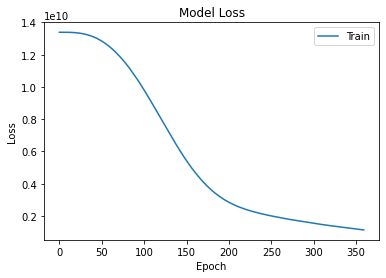

In [29]:
plt.plot(model_result.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')        # show Loss on y axis
plt.xlabel('Epoch')       # show epoch on x axis
plt.legend(['Train'], loc='upper right')
plt.show()

Visualizing **mean_absolute_error**

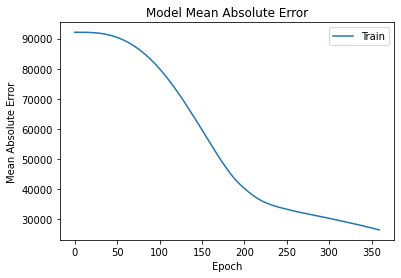

In [30]:
plt.plot(model_result.history['mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')        
plt.xlabel('Epoch')           # show epoch on x axis
plt.legend(['Train'], loc='upper right')
plt.show()

5. Make Predictions

In [46]:
# Separate data into training and testing groups
x1,x2,y1,y2 = train_test_split(
    X_testing, Y_testing, test_size=0.5)

In [47]:
y1

array([ 44269.,  14353., 150799., 137397.,  60287.,  27088., 137374.,
        41642.,  19212., 102426.,  15003.,  71111.,  41466.,  79984.,
        53330.,  30074., 112335., 200561.,  30835.,  29531., 121973.,
       190193., 207798.,  52410., 200284.,  74226.,  28710., 144961.,
       204367.,  83033.,  44225.,  41949.,  70318.,  14068.,  51465.,
        61927.,  43582.,  28521.,  25533.,  71271.,  28526., 166803.,
        31766.])

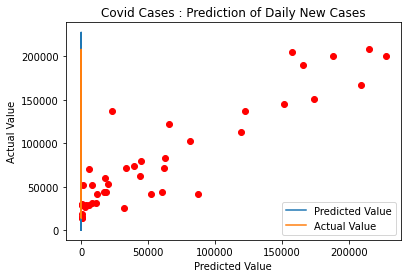

In [49]:
#predict  X_testing, Y_testing
df_predict = model.predict(x1)

df_test1 = pd.DataFrame(y1, columns = ['newCases'])

plt.scatter(df_predict,df_test1, color='red')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Covid Cases : Prediction of Daily New Cases')
plt.plot(df_predict, label='Predicted Value')
plt.plot(df_test1['newCases'].values, label='Actual Value')
plt.legend();